# 1.	Lakukan analisa klasifikasikan berita dengan extraksi fitur model topik modelling dengan classifier naïve bayes dan SVM

data==>  https://drive.google.com/file/d/1a776C4mmVbC-84gx_No0is9QDfpWFIme/view?usp=drive_link

In [4]:
import pandas as pd

df = pd.read_csv('/content/Berita (4).csv')
print(df.head())

   No                                              judul  \
0   1  Airlangga Harap Kenaikan UMP Tingkatkan Daya B...   
1   2  PT SIER Beri Penghargaan untuk 50 Tenant Terba...   
2   3  Prabowo Bakal Bentuk Kementerian Penerimaan Ne...   
3   4  Sinergi Kemenag & BPJS Ketenagakerjaan Lindung...   
4   5  Pemerintah Segera Bentuk Satgas PHK Usai Tetap...   

                                              berita  \
0  Menteri Koordinator (Menko) Bidang Perekonomia...   
1  Dalam rangka memeriahkan hari jadi ke-50, PT S...   
2  Wacana Presiden Prabowo Subianto akan membentu...   
3  BPJS Ketenagakerjaan dan Kementerian Agama (Ke...   
4  Pemerintah akan segera membentuk Satuan Tugas ...   

                         tanggal kategori  \
0  Minggu, 01 Des 2024 23:40 WIB  Ekonomi   
1  Minggu, 01 Des 2024 20:45 WIB  Ekonomi   
2  Minggu, 01 Des 2024 19:40 WIB  Ekonomi   
3  Minggu, 01 Des 2024 19:03 WIB  Ekonomi   
4  Minggu, 01 Des 2024 19:00 WIB  Ekonomi   

                               

In [26]:
print(df['kategori'].unique())


['Ekonomi' 'Olahraga' 'Nasional' 'Internasional']


In [29]:
print(df['kategori'].value_counts())

kategori
Ekonomi          375
Olahraga         375
Nasional         375
Internasional    375
Name: count, dtype: int64


In [1]:
!pip install sastrawi
!pip install gensim
!pip install nltk

In [10]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from gensim.utils import simple_preprocess

# Unduh stopwords
nltk.download('stopwords')

# Inisialisasi stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()
stop_words = set(stopwords.words('indonesian'))

# ==== Fungsi Preprocessing Lengkap ====
def full_preprocess(text):
    # 1️⃣ Cleaning (hapus angka, tanda baca, simbol)
    cleaned = re.sub('[^a-zA-Z]', ' ', text.lower())

    # 2️⃣ Tokenizing
    tokens = simple_preprocess(cleaned)

    # 3️⃣ Stopword Removal
    no_stop = [t for t in tokens if t not in stop_words]

    # 4️⃣ Stemming
    stemmed = [stemmer.stem(t) for t in no_stop]

    # Gabungkan hasil untuk setiap tahap
    return pd.Series({
        'berita':text,
        'stopword_removal':no_stop,
        'pwmbersihan_kata':cleaned,
        'stemming':stemmed,
        'token':tokens
    })

# ==== Terapkan ke semua data ====
hasil_preprocessing = df['berita'].apply(full_preprocess)

# ==== Gabungkan hasil ====
processed_df = pd.concat([hasil_preprocessing], axis=1)

# ==== Tampilkan hasilnya ====
pd.set_option('display.max_colwidth', None)
print(processed_df.head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
# ==== Simpan ke CSV ====
processed_df.to_csv('hasil_preprocessing.csv', index=False, encoding='utf-8')

# ==== Konfirmasi ====
print("✅ File 'hasil_preprocessing.csv' berhasil disimpan!")

✅ File 'hasil_preprocessing.csv' berhasil disimpan!


In [16]:
processed_df.head()

,berita,stopword_removal,pwmbersihan_kata,stemming,token
0,"Menteri Koordinator (Menko) Bidang Perekonomian Airlangga Hartarto berharap kenaikan upah minimum provinsi (UMP) sebesar 6,5 persen pada tahun 2025 bisa meningkatkan daya beli masyarakat kelas menengah.""Oleh karena itu, sebagai start awal untuk menunjang daya beli mereka (masyarakat kelas menengah) maka kenaikan upah minimumnya didongkrak ke 6,5 persen,"" kata Airlangga di sela menghadiri Rapat Pimpinan Nasional (Rapimnas) Kadin 2024 di Jakarta, Minggu.Dia menyampaikan di tengah ketidakpastian global, pemerintah harus memperkuat struktur perekonomian dalam negeri. Salah satu struktur tersebut adalah kegiatan belanja kelompok masyarakat kelas menengah. Airlangga menuturkan kelompok masyarakat kelas menengah memiliki peran vital untuk mendorong komponen konsumsi. Konsumsi selama ini masih menjadi penopang terbesar pertumbuhan ekonomi nasional.Pemerintah Segera Bentuk Satgas PHK Usai Tetapkan UMP Naik 6,5 Persen ""Kita melihat di tengah ketidakpastian global yang harus kita lakukan adalah pendalaman struktur perekonomian di Indonesia menjaga daya beli, meningkatkan kelas menengah kita,"" ujarnya.Dia menyebutkan rata-rata pendapatan masyarakat Indonesia yaitu sebesar Rp2 juta sampai Rp9 juta.Sementara pengeluaran perbulannya juga mencapai Rp2 juta sampai Rp9 juta. Namun, kata Airlangga, saat ini pengeluaran warga kebanyakan di bawah Rp5 juta sebulan.""Saat sekarang terbesar adalah pengeluaran di bawah Rp5 juta sebulan. Nah, itu yang mendasari Bapak Presiden (Prabowo Subianto) kemarin kita rapat untuk meningkatkan daya beli yang di sektor formal itu sebagian besar adalah pekerja di kalangan industri dan servis,"" tuturnya.Krena itu, untuk menunjang daya beli masyarakat kelas menengah, pemerintah menaikkan UMP 6,5 persen. Pemerintah ingin mempertahankan daya beli warga kelas menengah.""Jadi tujuannya kita untuk mempertahankan daya beli dari pada kelas menengah kita yang tir atau desil di bawah 40 persen. Nah, ini penting untuk kita jaga karena pertumbuhan ekonomi kita ke depan, bahkan di kuartal ini tergantung dari pada daya beli kelas menengah,"" ucap Airlangga.""Persoalannya daya beli yang kelas atas ini kadang-kadang kalau dia enggak dibeli barang ini desil 9 dan 10 dia belanja ke luar negeri. Maka kita betul-betul harus menjaga di kelas menengah ini,"" tambahnya.Apindo Merasa Tak Didengar Prabowo soal Kenaikan UMP 6,5 PersenSebelumnya, Presiden Prabowo Subianto mengumumkan kenaikan rata-rata UMP nasional sebesar 6,5 persen untuk tahun 2025. Hal ini berdasarkan hasil keputusan melalui rapat terbatas bersama pihak terkait pada Jumat (29/11) .""Kita ambil keputusan untuk menaikkan rata-rata upah minimum nasional pada tahun 2025 sebesar 6,5 persen,"" kata Prabowo di Kantor Presiden, Kompleks Istana Kepresidenan, Jakarta.Presiden mengatakan kenaikan ini sedikit lebih tinggi dari usulan Menteri Ketenagakerjaan, Yassierli, yang sebelumnya merekomendasikan kenaikan sebesar 6 persen.Keputusan itu diambil setelah rapat terbatas yang membahas upah minimum sebagai jaring pengaman sosial bagi pekerja, terutama yang bekerja kurang dari 12 bulan. (tim/tsa) [Gambas:Video CNN]","[menteri, koordinator, menko, bidang, perekonomian, airlangga, hartarto, berharap, kenaikan, upah, minimum, provinsi, ump, persen, meningkatkan, daya, beli, masyarakat, kelas, menengah, start, menunjang, daya, beli, masyarakat, kelas, menengah, kenaikan, upah, minimumnya, didongkrak, persen, airlangga, menghadiri, rapat, pimpinan, nasional, rapimnas, kadin, jakarta, minggu, ketidakpastian, global, pemerintah, memperkuat, struktur, perekonomian, negeri, salah, struktur, kegiatan, belanja, kelompok, masyarakat, kelas, menengah, airlangga, kelompok, masyarakat, kelas, menengah, memiliki, peran, vital, mendorong, komponen, konsumsi, konsumsi, penopang, terbesar, pertumbuhan, ekonomi, nasional, pemerintah, bentuk, satgas, phk, tetapkan, ump, persen, ketidakpastian, global, lakukan, pendalaman, struktur, perekonomian

## Get a BOW

In [19]:
import pandas as pd
from gensim import corpora

# --- Ambil token hasil preprocessing ---
texts = processed_df['stemming'].tolist()

# --- Buat dictionary dan corpus (BoW) ---
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# --- Ubah corpus jadi DataFrame ---
rows = []
for i, doc in enumerate(corpus):
    for word_id, freq in doc:
        rows.append({
            'Dokumen': i + 1,
            'Kata': dictionary[word_id],
            'Frekuensi': freq
        })

bow_df = pd.DataFrame(rows)

# --- Tampilkan hasilnya (5 dokumen pertama) ---
pd.set_option('display.max_rows', 50)
print(bow_df.head(20))  # tampilkan 20 baris pertama

# --- (Opsional) Simpan ke CSV ---
bow_df.to_csv('hasil_bow.csv', index=False)
print("\n✅ File 'hasil_bow.csv' berhasil disimpan di direktori kerja!")

    Dokumen       Kata  Frekuensi
0         1  airlangga          5
1         1      ambil          2
2         1     apindo          1
3         1      bahas          1
4         1     banyak          1
5         1     barang          1
6         1      batas          2
7         1    belanja          2
8         1       beli         10
9         1     bentuk          1
10        1      besar          2
11        1     bidang          1
12        1      bulan          3
13        1      capai          1
14        1        cnn          1
15        1      dalam          1
16        1      dapat          1
17        1      dasar          2
18        1       daya          9
19        1     dengar          1

✅ File 'hasil_bow.csv' berhasil disimpan di direktori kerja!


In [28]:
num_topics = 5  # bisa kamu ubah sesuai kebutuhan
lda_model = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=10)
for idx, topic in lda_model.print_topics(num_words=10):
    print(f"Topik {idx+1}: {topic}")

Topik 1: 0.008*"makan" + 0.008*"gizi" + 0.007*"prabowo" + 0.006*"anak" + 0.006*"program" + 0.005*"mbg" + 0.005*"presiden" + 0.004*"video" + 0.004*"persen" + 0.004*"temu"
Topik 2: 0.009*"bakar" + 0.007*"orang" + 0.007*"warga" + 0.006*"korban" + 0.005*"yoon" + 0.005*"as" + 0.005*"presiden" + 0.005*"air" + 0.005*"banjir" + 0.005*"cnn"
Topik 3: 0.010*"israel" + 0.009*"rp" + 0.007*"menteri" + 0.007*"perintah" + 0.006*"persen" + 0.006*"senjata" + 0.006*"gaza" + 0.006*"gencat" + 0.005*"prabowo" + 0.005*"laku"
Topik 4: 0.012*"gol" + 0.011*"menit" + 0.010*"main" + 0.010*"indonesia" + 0.007*"gawang" + 0.006*"piala" + 0.006*"aff" + 0.006*"hasil" + 0.006*"filipina" + 0.005*"vietnam"
Topik 5: 0.018*"indonesia" + 0.015*"laut" + 0.012*"pagar" + 0.010*"main" + 0.009*"timnas" + 0.008*"latih" + 0.006*"piala" + 0.005*"milik" + 0.005*"menang" + 0.005*"menteri"


In [40]:
# Tampilkan kata-kata penting di setiap topik
for idx, topic in lda_model.show_topics(num_topics=num_topics, num_words=10, formatted=False):
    print(f"\n🟦 Topik {idx+1}")
    print(", ".join([word for word, prob in topic]))

#['Ekonomi' 'Olahraga' 'Nasional' 'Internasional']



🟦 Topik 1
israel, senjata, gencat, gaza, hamas, menteri, yoon, presiden, tahan, orang

🟦 Topik 2
laut, pagar, orang, perintah, presiden, menteri, jakarta, jalan, warga, negara

🟦 Topik 3
indonesia, main, timnas, piala, gol, latih, menit, laga, tanding, tim

🟦 Topik 4
persen, rp, program, menteri, perintah, prabowo, makan, gizi, ppn, presiden

🟦 Topik 5
indonesia, negara, brics, menteri, harga, kerja, anggota, tingkat, ekonomi, usaha


In [38]:
import pandas as pd

# Pastikan kamu sudah punya DataFrame: topic_df_percent
# (berisi kolom Topik_1, Topik_2, dst.)

# Ubah index jadi kolom Dokumen
topic_labeled_df = topic_df_percent.reset_index().rename(columns={'index': 'Dokumen'})

# Pilih hanya kolom dokumen dan topik
columns_to_show = ['Dokumen'] + [col for col in topic_labeled_df.columns if col.startswith('Topik_')]

# Tampilkan seluruh dataset dalam bentuk tabel DataFrame
from IPython.display import display

pd.set_option('display.max_rows', None)        # tampilkan semua baris
pd.set_option('display.max_columns', None)     # tampilkan semua kolom
pd.set_option('display.max_colwidth', None)    # lebar kolom bebas
pd.set_option('display.width', 2000)           # atur lebar tampilan tabel

display(topic_labeled_df[columns_to_show])

# Simpan seluruh hasil distribusi topik ke file CSV
topic_labeled_df[columns_to_show].to_csv("hasil_lda_distribusi_topik.csv", index=False, encoding='utf-8-sig')

print("✅ File berhasil disimpan sebagai 'hasil_lda_distribusi_topik.csv'")

,Dokumen,Topik_1,Topik_2,Topik_3,Topik_4,Topik_5,Topik_Dominan
0,Dokumen_1,0.080000,0.080000,0.080000,99.669998,0.080000,Topik_4
1,Dokumen_2,0.070000,0.070000,0.070000,0.070000,99.739998,Topik_5
2,Dokumen_3,0.090000,29.760000,0.090000,63.720001,6.350000,Topik_4
3,Dokumen_4,0.130000,0.120000,0.120000,99.500000,0.130000,Topik_4
4,Dokumen_5,0.110000,1.190000,0.100000,97.660004,0.940000,Topik_4
5,Dokumen_6,0.100000,49.209999,0.100000,43.889999,6.710000,Topik_2
6,Dokumen_7,0.120000,4.530000,0.120000,95.120003,0.120000,Topik_4
7,Dokumen_8,0.100000,0.100000,0.100000,99.620003,0.100000,Topik_4
8,Dokumen_9,0.130000,0.130000,0.130000,99.480003,0.130000,Topik_4
9,Dokumen_10,0.110000,0.110000,0.110000,23.680000,76.000000,Topik_5


✅ File berhasil disimpan sebagai 'hasil_lda_distribusi_topik.csv'


In [51]:
import pandas as pd
from IPython.display import display

# Pastikan kamu sudah punya DataFrame: topic_df_percent
# (berisi kolom Topik_1, Topik_2, dst.)

# Ubah index jadi kolom Dokumen
topic_labeled_df = topic_df_percent.reset_index().rename(columns={'index': 'Dokumen'})

# Pilih hanya kolom Dokumen dan kolom Topik (Topik_1 - Topik_5)
columns_to_show = ['Dokumen'] + [col for col in topic_labeled_df.columns if col.startswith('Topik_')]

# Gabungkan dengan kolom 'kategori' dari DataFrame asli
topic_labeled_df = pd.concat([topic_labeled_df, df['kategori'].reset_index(drop=True)], axis=1)

# Pilih hanya kolom yang akan ditampilkan
final_columns = columns_to_show + ['kategori']

# Atur tampilan tabel
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 2000)

# Tampilkan hasil dalam bentuk tabel
display(topic_labeled_df[final_columns])

# Simpan ke file CSV
topic_labeled_df[final_columns].to_csv(
    "hasil_lda_topik_dan_kategori.csv",
    index=False,
    encoding='utf-8-sig'
)

print("✅ File berhasil disimpan sebagai 'hasil_lda_topik_dan_kategori.csv'")

,Dokumen,Topik_1,Topik_2,Topik_3,Topik_4,Topik_5,Topik_Dominan,kategori
0,Dokumen_1,0.080000,0.080000,0.080000,99.669998,0.080000,Topik_4,Ekonomi
1,Dokumen_2,0.070000,0.070000,0.070000,0.070000,99.739998,Topik_5,Ekonomi
2,Dokumen_3,0.090000,29.760000,0.090000,63.720001,6.350000,Topik_4,Ekonomi
3,Dokumen_4,0.130000,0.120000,0.120000,99.500000,0.130000,Topik_4,Ekonomi
4,Dokumen_5,0.110000,1.190000,0.100000,97.660004,0.940000,Topik_4,Ekonomi
5,Dokumen_6,0.100000,49.209999,0.100000,43.889999,6.710000,Topik_2,Ekonomi
6,Dokumen_7,0.120000,4.530000,0.120000,95.120003,0.120000,Topik_4,Ekonomi
7,Dokumen_8,0.100000,0.100000,0.100000,99.620003,0.100000,Topik_4,Ekonomi
8,Dokumen_9,0.130000,0.130000,0.130000,99.480003,0.130000,Topik_4,Ekonomi
9,Dokumen_10,0.110000,0.110000,0.110000,23.680000,76.000000,Topik_5,Ekonomi


✅ File berhasil disimpan sebagai 'hasil_lda_topik_dan_kategori.csv'


## Klasifikasi

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Muat data hasil LDA
df_lda = pd.read_csv("hasil_lda_topik_dan_kategori.csv")

# Pisahkan fitur dan label
X = df_lda[['Topik_1', 'Topik_2', 'Topik_3', 'Topik_4', 'Topik_5']]
y = df_lda['kategori']

# Bagi data menjadi data latih dan data uji (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Klasifikasi menggunakan Naive Bayes (Gaussian)

In [53]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score

# Inisialisasi model
nb_model = GaussianNB()

# Latih model
nb_model.fit(X_train, y_train)

# Prediksi
y_pred_nb = nb_model.predict(X_test)

# Evaluasi
print("=== Naive Bayes ===")
print("Akurasi:", round(accuracy_score(y_test, y_pred_nb) * 100, 2), "%")
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred_nb))

=== Naive Bayes ===
Akurasi: 72.0 %

Laporan Klasifikasi:
                precision    recall  f1-score   support

      Ekonomi       0.69      0.81      0.75        75
Internasional       0.67      0.64      0.65        75
     Nasional       0.53      0.49      0.51        75
     Olahraga       1.00      0.93      0.97        75

     accuracy                           0.72       300
    macro avg       0.72      0.72      0.72       300
 weighted avg       0.72      0.72      0.72       300



## Klasifikasi menggunakan SVM

In [54]:
from sklearn.svm import SVC

# Inisialisasi model SVM
svm_model = SVC(kernel='linear', random_state=42)

# Latih model
svm_model.fit(X_train, y_train)

# Prediksi
y_pred_svm = svm_model.predict(X_test)

# Evaluasi
print("=== Support Vector Machine (SVM) ===")
print("Akurasi:", round(accuracy_score(y_test, y_pred_svm) * 100, 2), "%")
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred_svm))

=== Support Vector Machine (SVM) ===
Akurasi: 74.0 %

Laporan Klasifikasi:
                precision    recall  f1-score   support

      Ekonomi       0.77      0.81      0.79        75
Internasional       0.69      0.59      0.63        75
     Nasional       0.53      0.56      0.54        75
     Olahraga       0.97      1.00      0.99        75

     accuracy                           0.74       300
    macro avg       0.74      0.74      0.74       300
 weighted avg       0.74      0.74      0.74       300



# 2.	Lakukan  analisa clutering dokumen pada data email berikut
https://drive.google.com/file/d/1wyFO8424PDG8sDZ_6mBJvoKfiwbWnDe7/view?usp=drive_link


In [64]:
import pandas as pd

df = pd.read_csv('/content/spam.csv', encoding='latin-1')
df.head()

,id,Text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,1,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",NaN,NaN,NaN
1,2,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,3,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,NaN,NaN,NaN
3,4,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,5,"Nah I don't think he goes to usf, he lives around here though",NaN,NaN,NaN


In [88]:

# ===============================
# 1. Import library
# ===============================
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

nltk.download('stopwords')

# ===============================
# 2. Load dataset
# ===============================
df = pd.read_csv('spam.csv', encoding='latin-1')  # ganti path sesuai file kamu
# Pastikan kolom teks bernama 'Text'
df = df[['Text']]  # ambil kolom Text saja jika ada kolom lain

# ===============================
# 3. Preprocessing teks
# ===============================
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess(text):
    text = text.lower()                      # lowercase
    text = re.sub(r'[^a-z\s]', '', text)     # hapus angka & simbol
    tokens = text.split()                     # tokenisasi
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]  # stopwords & stemming
    return ' '.join(tokens)

# Terapkan preprocessing ke kolom Text
df['clean_text'] = df['Text'].apply(preprocess)

# ===============================
# 4. Cek hasil
# ===============================

df[['Text', 'clean_text']].head(10)  # tampilkan 10 data pertama

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Text,clean_text
0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",go jurong point crazi avail bugi n great world la e buffet cine got amor wat
1,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,free entri wkli comp win fa cup final tkt st may text fa receiv entri questionstd txt ratetc appli over
3,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,"Nah I don't think he goes to usf, he lives around here though",nah dont think goe usf live around though
5,"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv",freemsg hey darl week word back id like fun still tb ok xxx std chg send rcv
6,Even my brother is not like to speak with me. They treat me like aids patent.,even brother like speak treat like aid patent
7,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune,per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun
8,WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.,winner valu network custom select receivea prize reward claim call claim code kl valid hour
9,Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030,mobil month u r entitl updat latest colour mobil camera free call mobil updat co free


In [89]:
# ===============================
# 2a. TF-IDF ke DataFrame
# ===============================
import pandas as pd

# Ubah X (sparse matrix) ke array
tfidf_array = X.toarray()

# Ambil nama fitur (kata)
feature_names = vectorizer.get_feature_names_out()

# Buat DataFrame
tfidf_df = pd.DataFrame(tfidf_array, columns=feature_names)

# Tambahkan kolom label asli (jika ada)
# misal df['Label'] berisi 'spam'/'ham'
# tfidf_df['Label'] = df['Label']

# Tampilkan 5 baris pertama
print(tfidf_df.head())
print(tfidf_df.shape)


   abiola  abl  abt  accept  access  account  across  activ  actual   ad  add  address  admir  aft  afternoon  age  ago   ah  aight  aint  alex  almost  alon   alreadi  alright  also  alway  amp  ampm   an  angri  anoth  answer  anymor  anyon  anyth  anytim  anyway  apart  app     appli  appreci  ard  area    around  arriv  asap  ask  askd  ass  attempt  auction     avail  ave  await  award  away  awesom  babe  babi  back  bad  bag  bak  bank  basic  bath   bb  bcoz  bday  beauti  becom  bed  believ  best  better  bid  big  bill  birthday  bit  bless  blue  bluetooth  bold  bonu  book  bore  boss  bout  box  boy  boytoy  break  bring  brother  bslvyl   bt  btnationalr   bu  busi  buy  call  caller  callertun  camcord  came  camera  cancel  cant  car  card  care  carlo  case  cash  catch  caus   cd  chanc  chang  charg  chariti  chat  cheap  check  cheer  chennai  chikku  children  choos  christma  cinema  claim  class  clean  clear  close  club   co  code  colleagu  collect  colleg  co

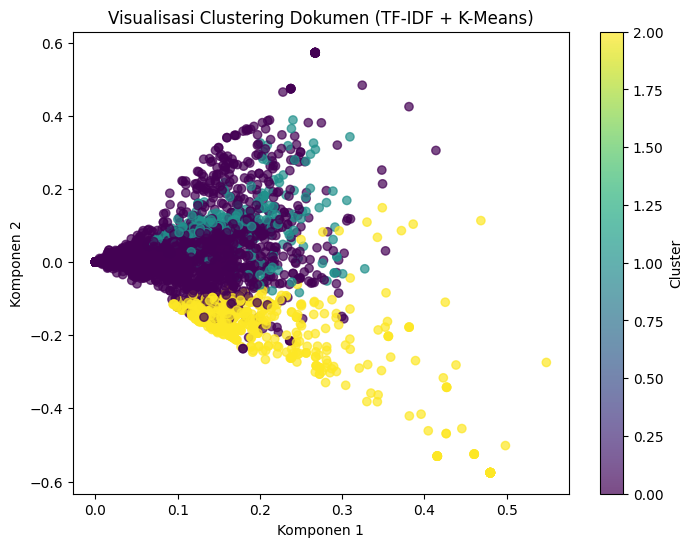

In [90]:
# ===============================
# 5. K-Means Clustering
# ===============================
# Tentukan K optimal (misal 3)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X)
df['cluster'] = clusters

# ===============================
# 6. Visualisasi 2D menggunakan TruncatedSVD
# ===============================
svd = TruncatedSVD(n_components=2, random_state=42)
X_2d = svd.fit_transform(X)

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_2d[:,0], X_2d[:,1], c=clusters, cmap='viridis', alpha=0.7)
plt.title("Visualisasi Clustering Dokumen (TF-IDF + K-Means)")
plt.xlabel("Komponen 1")
plt.ylabel("Komponen 2")
plt.colorbar(scatter, label='Cluster')
plt.show()